In [ ]:
# should we find min, max, std dev, covariance, correlation for the features in this case?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

dataset = pd.read_csv('../data/cleaned/aggregated_dataset.csv')

cir_features = dataset.columns[15:]

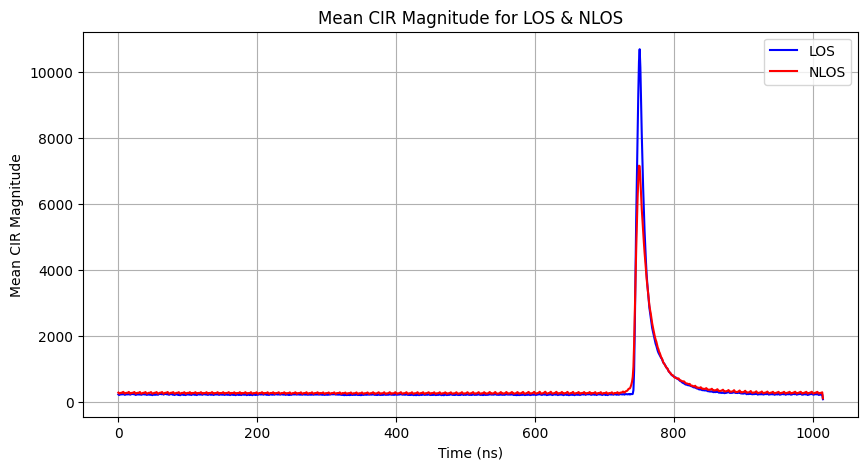

In [3]:
# Calculate mean CIR magnitude for each nanosecond
los_cir_office_data = dataset[dataset['NLOS'] == 0][cir_features]
nlos_cir_office_data = dataset[dataset['NLOS'] == 1][cir_features]

y_los = los_cir_office_data.mean()
y_nlos = nlos_cir_office_data.mean()

time_ns = np.arange(len(y_los))



plt.figure(figsize=(10, 5))
plt.plot(time_ns, y_los, label='LOS', color='blue')
plt.plot(time_ns, y_nlos, label='NLOS', color='red')
plt.xlabel('Time (ns)')
plt.ylabel('Mean CIR Magnitude')
plt.title('Mean CIR Magnitude for LOS & NLOS')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Discard columns with less than difference of 100 (???)
for i in range(0, len(y_los)):
    diff = y_los[f'CIR{i}'] - y_nlos[f'CIR{i}']
    if diff > 100 or diff < -100:
        print(f'CIR{i}', y_los[f'CIR{i}'] - y_nlos[f'CIR{i}'])

CIR733 -109.01604761904761
CIR734 -135.59585714285714
CIR735 -157.81471428571427
CIR736 -167.08561904761908
CIR737 -187.59104761904763
CIR738 -222.7380476190476
CIR739 -288.1309047619048
CIR740 -380.4294285714286
CIR741 -511.1914761904761
CIR742 -707.1091428571427
CIR743 -807.427761904762
CIR744 -468.9937142857143
CIR745 269.98861904761907
CIR746 924.0390000000007
CIR747 1429.2763333333332
CIR748 1992.3350476190471
CIR749 2606.2297142857133
CIR750 3156.843809523809
CIR751 3544.2758095238087
CIR752 3387.04419047619
CIR753 2840.357190476191
CIR754 2274.9765714285722
CIR755 1799.8507619047614
CIR756 1324.005761904762
CIR757 960.7088095238096
CIR758 672.9209999999994
CIR759 428.7711428571429
CIR760 242.50723809523834
CIR761 130.05223809523795
CIR767 -108.36685714285704
CIR768 -141.6087142857141
CIR769 -142.67595238095237
CIR770 -129.51904761904734
CIR771 -121.30723809523784
CIR772 -129.91628571428555
CIR773 -126.87738095238092
CIR774 -127.96023809523808
CIR775 -126.61076190476183
CIR776 -1

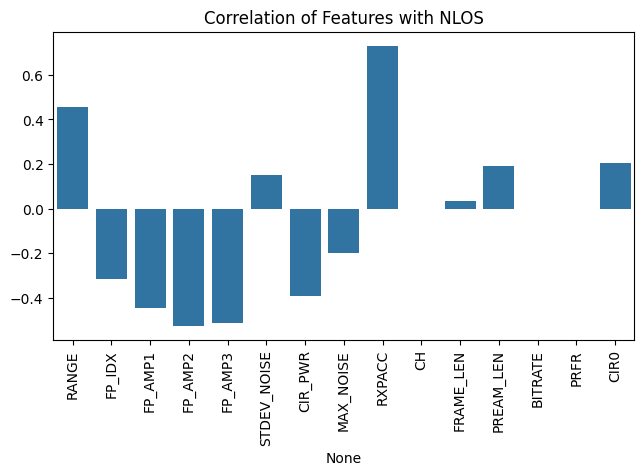

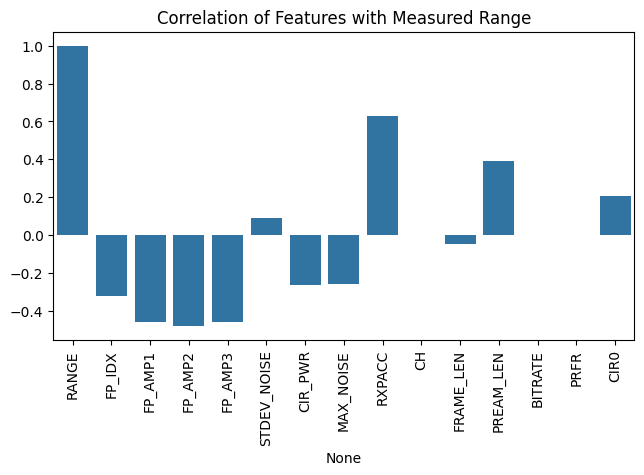

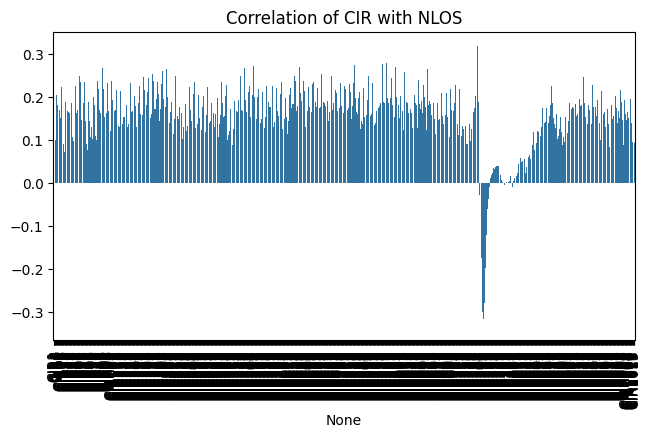

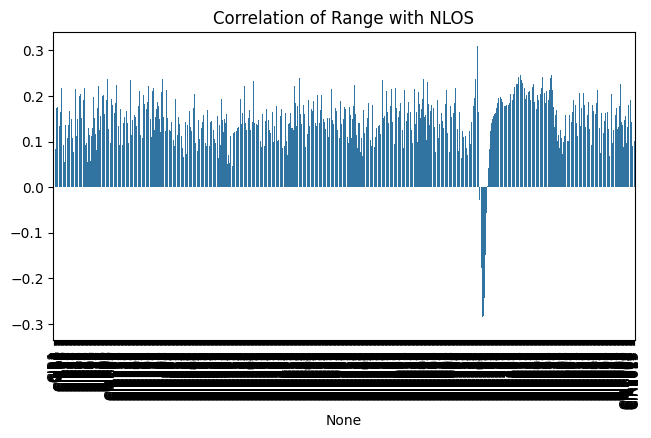

In [5]:
# Check which features are irrelevant to labels
import seaborn as sns

correlation_nlos = dataset.iloc[:, 1:16].corrwith(dataset['NLOS'])
correlation_range = dataset.iloc[:, 1:16].corrwith(dataset['RANGE'])
correlation_nlos_with_cir = dataset.iloc[:, 16:].corrwith(dataset['NLOS'])
correlation_range_with_cir = dataset.iloc[:, 16:].corrwith(dataset['RANGE'])

plt.figure(figsize=(7.5, 4))
sns.barplot(x=correlation_nlos.index, y=correlation_nlos.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with NLOS')
plt.show()

plt.figure(figsize=(7.5, 4))
sns.barplot(x=correlation_range.index, y=correlation_range.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Measured Range')
plt.show()

plt.figure(figsize=(7.5, 4))
sns.barplot(x=correlation_nlos_with_cir.index, y=correlation_nlos_with_cir.values)
plt.xticks(rotation=90)
plt.title('Correlation of CIR with NLOS')
plt.show()

plt.figure(figsize=(7.5, 4))
sns.barplot(x=correlation_range_with_cir.index, y=correlation_range_with_cir.values)
plt.xticks(rotation=90)
plt.title('Correlation of Range with NLOS')
plt.show()

# correlation = dataset.iloc[:, :15].corr()

# axis_corr = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(50, 500, n=500), square=True)

# plt.show()

In [6]:
# # Use deep learning to train and evaluate model
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
# from sklearn.model_selection import train_test_split

# feature_columns = uwb_los_nlos_data.columns.difference(['NLOS', 'RANGE'])

# X = uwb_los_nlos_data[feature_columns].values
# y_classification = uwb_los_nlos_data['NLOS'].values
# y_regression = uwb_los_nlos_data['RANGE'].values

# X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(X, y_classification, y_regression, test_size=0.2, random_state=42)

# input_layer = Input(shape=(X.shape[1],))

# shared = Dense(128, activation='relu')(input_layer)
# shared = BatchNormalization()(shared)
# shared = Dense(64, activation='relu')(shared)
# shared = Dropout(0.2)(shared)

# classification_output = Dense(1, activation='sigmoid', name='classification')(shared)

# regression_output = Dense(1, activation='linear', name='regression')(shared)

# model = Model(inputs=input_layer, outputs=[classification_output, regression_output])

# model.compile(optimizer='adam', loss={'classification': 'binary_crossentropy', 'regression':'mse'}, metrics={'classification': 'accuracy', 'regression': 'mae'})

# model.summary()

# history = model.fit(X_train, {'classification': y_class_train, 'regression': y_reg_train}, validation_data=(X_test, {'classification': y_class_test, "regression": y_reg_test}), epochs=50, batch_size=32)

# results = model.evaluate(X_test, {'classification': y_class_test, 'regression': y_reg_test})
# print('Test Loss & Metrics:', results)